In [37]:
import matplotlib.pyplot as plt
plt.style.use('./nice.mplstyle')
import numpy as np
import pandas as pd
df = pd.read_csv("test-result.csv", na_values='Resolution').dropna().astype(float)
df

,Resolution,Radii threshold,Density threshold percentile,Mass conservation,Momentum conservation,Energy conservation,Specific energy conservation,Computation time
0,64.0,1.0000,5.0,0.977038,0.976942,0.97655,0.999501,67.842240
1,64.0,1.0000,5.0,0.977038,0.976998,0.97655,0.999501,67.842240
2,64.0,1.0000,5.0,0.977038,0.973432,0.97655,0.999501,67.842240
4,64.0,1.0000,10.0,0.977038,0.976942,0.97655,0.999501,65.010999
5,64.0,1.0000,10.0,0.977038,0.976998,0.97655,0.999501,65.010999
...,...,...,...,...,...,...,...,...
281,512.0,0.0001,15.0,0.984003,0.983734,0.98319,0.999174,1051.761762
282,512.0,0.0001,15.0,0.984003,0.985805,0.98319,0.999174,1051.761762
284,512.0,0.0001,20.0,0.984003,0.983495,0.98319,0.999174,1030.521404
285,512.0,0.0001,20.0,0.984003,0.983734,0.98319,0.999174,1030.521404


In [38]:
class Columns:
    e     = "Specific energy conservation"
    E     = "Energy conservation"
    M     = "Mass conservation"
    rho   = "Density threshold percentile"
    r     = "Radii threshold"
    Nsize = "Resolution"

In [39]:
df[Columns.r] += 1e-6

In [40]:
a = np.array([1,2,3,4,5], dtype=object)
a[3] = 'a'
a

array([1, 2, 3, 'a', 5], dtype=object)

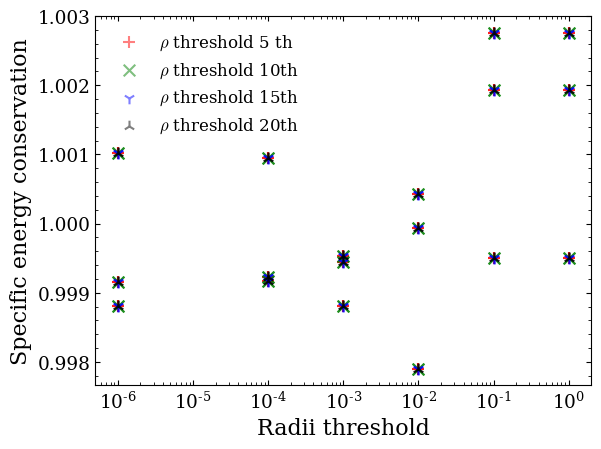

In [41]:
fig, ax = plt.subplots()
df[df[Columns.rho] == 5 ].plot(kind='scatter',x=Columns.r, y=Columns.e, marker='+', label=f"$\\rho$ threshold 5 th", logx=True, ax=ax, alpha=0.5, s=70, color='r')
df[df[Columns.rho] == 10].plot(kind='scatter',x=Columns.r, y=Columns.e, marker='x', label=f"$\\rho$ threshold 10th", logx=True, ax=ax, alpha=0.5, s=70, color='g')
df[df[Columns.rho] == 15].plot(kind='scatter',x=Columns.r, y=Columns.e, marker='1', label=f"$\\rho$ threshold 15th", logx=True, ax=ax, alpha=0.5, s=70, color='b')
df[df[Columns.rho] == 20].plot(kind='scatter',x=Columns.r, y=Columns.e, marker='2', label=f"$\\rho$ threshold 20th", logx=True, ax=ax, alpha=0.5, s=70, color='black')
plt.show()

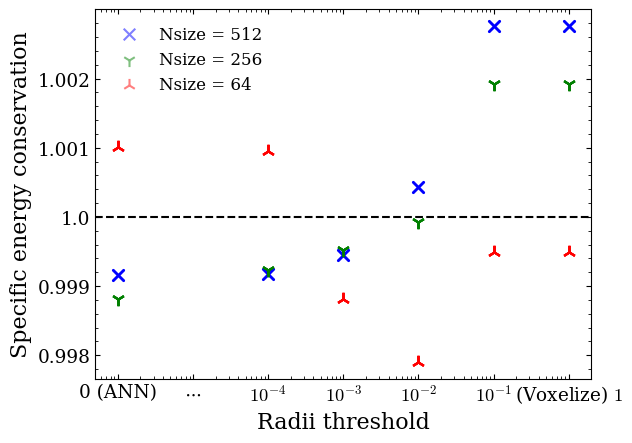

In [42]:
fig, ax = plt.subplots()
df[df[Columns.Nsize] == 512].plot(kind='scatter',x=Columns.r, y=Columns.e, marker='x', logx=True, label=f"Nsize = 512", ax=ax, alpha=0.5, s=70, color='b')
df[df[Columns.Nsize] == 256].plot(kind='scatter',x=Columns.r, y=Columns.e, marker='1', logx=True, label=f"Nsize = 256", ax=ax, alpha=0.5, s=90, color='g')
df[df[Columns.Nsize] == 64].plot(kind='scatter',x=Columns.r, y=Columns.e, marker='2', logx=True, label=f"Nsize = 64", ax=ax, alpha=0.5, s=90, color='r')
ax.axhline(1, color='black', linestyle='--')
ax.set_yticks([0.998, 0.999, 1, 1.001, 1.002])
ax.set_yticklabels(['0.998', '0.999', '1.0', '1.001', '1.002'])
ax.set_xticks([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1])
ax.set_xticklabels(['0 (ANN)', '$\\cdots$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '(Voxelize) $1$'])
plt.show()

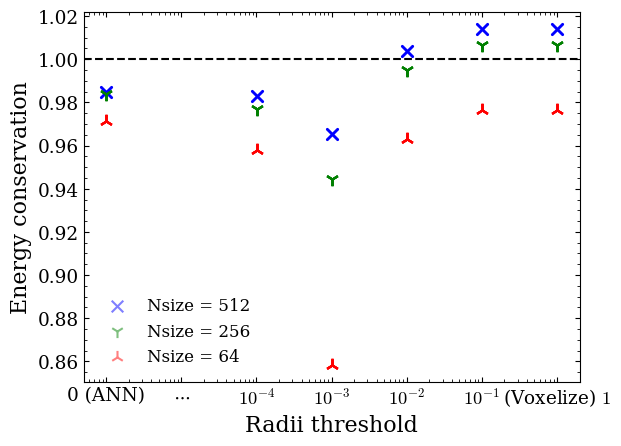

In [43]:
fig, ax = plt.subplots()
df[df[Columns.Nsize] == 512].plot(kind='scatter',x=Columns.r, y=Columns.E, marker='x', logx=True, label=f"Nsize = 512", ax=ax, alpha=0.5, s=70, color='b')
df[df[Columns.Nsize] == 256].plot(kind='scatter',x=Columns.r, y=Columns.E, marker='1', logx=True, label=f"Nsize = 256", ax=ax, alpha=0.5, s=90, color='g')
df[df[Columns.Nsize] == 64 ].plot(kind='scatter',x=Columns.r, y=Columns.E, marker='2', logx=True, label=f"Nsize = 64", ax=ax, alpha=0.5, s=90, color='r')
ax.axhline(1, color='black', linestyle='--')
ax.set_xticks([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1])
ax.set_xticklabels(['0 (ANN)', '$\\cdots$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '(Voxelize) $1$'])
plt.show()

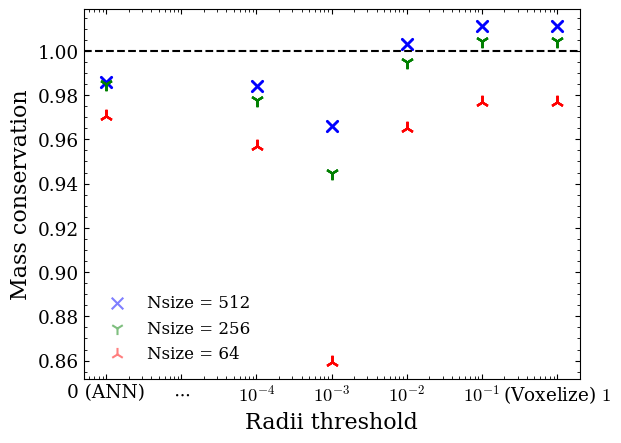

In [46]:
fig, ax = plt.subplots()
df[df[Columns.Nsize] == 512].plot(kind='scatter',x=Columns.r, y=Columns.M, marker='x', logx=True, label=f"Nsize = 512", ax=ax, alpha=0.5, s=70, color='b')
df[df[Columns.Nsize] == 256].plot(kind='scatter',x=Columns.r, y=Columns.M, marker='1', logx=True, label=f"Nsize = 256", ax=ax, alpha=0.5, s=90, color='g')
df[df[Columns.Nsize] == 64 ].plot(kind='scatter',x=Columns.r, y=Columns.M, marker='2', logx=True, label=f"Nsize = 64", ax=ax, alpha=0.5, s=90, color='r')
ax.axhline(1, color='black', linestyle='--')
ax.set_xticks([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1])
ax.set_xticklabels(['0 (ANN)', '$\\cdots$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '(Voxelize) $1$'])
plt.show()